# Perceptron
In this notebook, we implement a simple Perceptron classifier to solve a binary classification problem. The Perceptron is one of the earliest and simplest types of artificial neural networks, which classifies data by learning a linear decision boundary. We will:

1. Generate a synthetic dataset with two features and two classes.
2. Visualize the generated data.
3. Implement a Perceptron class with methods for training and prediction.
4. Train the Perceptron on the generated data and visualize the learning progress.
5. Compare the learning progress of two Perceptrons with different learning rates.
This notebook aims to demonstrate how the Perceptron algorithm works and how its performance is influenced by the learning rate.

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

## 1. Data Generation

Random data is generated using the 'make_classification' function, which is designed to create synthetic datasets for classification tasks. This dataset will be used to train and evaluate the perceptron model.



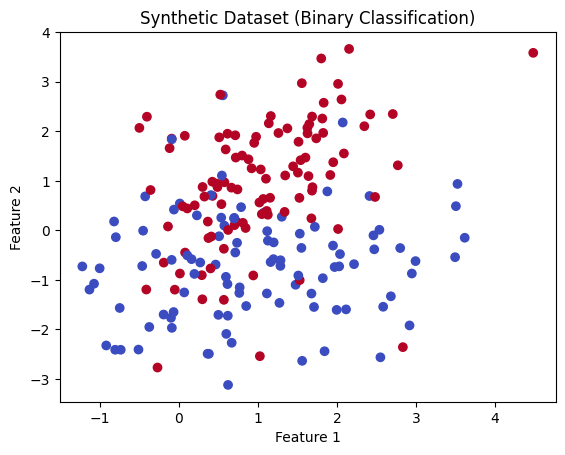

In [23]:
# Generate a synthetic dataset
X, y = make_classification(n_samples=200, n_features=2,
                           n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, flip_y=0.1,
                           class_sep=1.0, random_state=42)

# Convert target to -1 and 1 for perceptron
y = np.where(y == 0, -1, 1)

# Visualize the two classes in the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic Dataset (Binary Classification)')
plt.show()

## 2. Implementation of Perceptron class
The following code defines a Perceptron class for binary classification. The Perceptron is a type of linear classifier that updates its weights iteratively to minimize classification errors. It consists of methods for training (`train`), calculating net input (`net_input`), and making predictions (`predict`).

The main components of the class are:

- **`__init__`**: Initializes the learning rate and the number of epochs (iterations).
- **`train`**: Trains the perceptron using input features and target labels.
- **`net_input`**: Calculates the linear combination of weights and input features.
- **`predict`**: Returns the predicted class label based on the net input.

In [24]:
class Perceptron(object):
    """
    Perceptron classifier.

    Parameters
    ----------
    eta : float, default=0.5
        Learning rate (between 0.0 and 1.0).
    epochs : int, default=50
        Number of passes over the training dataset.
    """
    def __init__(self, eta = .5, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):
        """
        Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object
        """
        self.w_ = np.random.rand(1 + X.shape[1])

        self.errors_ = []

        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (self.predict(xi) - target)
                self.w_[:-1] -= update*xi
                self.w_[-1] -= update
                errors += int(update != 0)
            if errors == 0:
                return self
            else:
                self.errors_.append(errors)

        return self

    def net_input(self, X):
        """
        Calculate net input.

        Parameters
        ----------
        X : array-like, shape = [n_samples, n_features] or [n_features]
            Input values.

        Returns
        -------
        float or ndarray
            Net input (weighted sum).
        """
        return np.dot(X, self.w_[:-1]) + self.w_[-1]

    def predict(self, X):
        """
        Return class label after unit step.

        Parameters
        ----------
        X : array-like, shape = [n_samples, n_features] or [n_features]
            Input values.

        Returns
        -------
        int or ndarray
            Predicted class label.
        """
        return np.where(self.net_input(X) >= 0.0, 1, -1)

## 3. Perceptron training
The perceptron model is trained by iterating over the dataset, adjusting the weights and bias based on the prediction errors. During each iteration, the perceptron  calculates the linear combination of the input features and weights, applies the step function to make predictions, and then updates the weights to minimize the error.
The learning rate controls the size of the adjustments, and the number of iterations determines how many times the model will pass through the dataset.

In [25]:
# Train the perceptron

perceptron1 = Perceptron(eta=0.1, epochs=100)
perceptron1.train(X, y)

## 4. Evaluation
After training, the performance of the perceptron is evaluated by comparing the model's predictions with the actual labels. The model makes predictions using the learned weights and bias, and the accuracy can be measured by calculating how many predictions match the true labels. This process helps determine how well the model has learned to classify the data.
Visualizing the decision boundary or using metrics such as accuracy or confusion matrix can also provide insights into the model's effectiveness.

In [26]:
# Make predictions
y_hat = perceptron1.predict(X)
print(y_hat == y)

[ True  True False  True  True  True  True  True  True  True False  True
 False  True  True  True False False  True False False False False False
  True  True  True  True False  True False  True  True  True  True  True
  True False  True  True  True False False  True  True False  True False
  True  True False  True False False  True  True  True  True False False
  True False  True False False  True  True  True  True False False  True
  True  True  True  True  True  True  True False  True  True False  True
  True  True  True  True  True  True  True  True  True False  True  True
  True  True False False False  True  True  True  True  True  True  True
  True  True  True False  True  True  True  True False  True False  True
  True  True False False  True  True False  True False  True  True  True
  True  True  True  True  True False  True  True False False  True  True
  True  True  True  True  True False False  True False  True False False
  True  True  True  True  True  True  True  True  T

In [27]:
accuracy = np.sum(y == y_hat) / len(y_hat)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.73


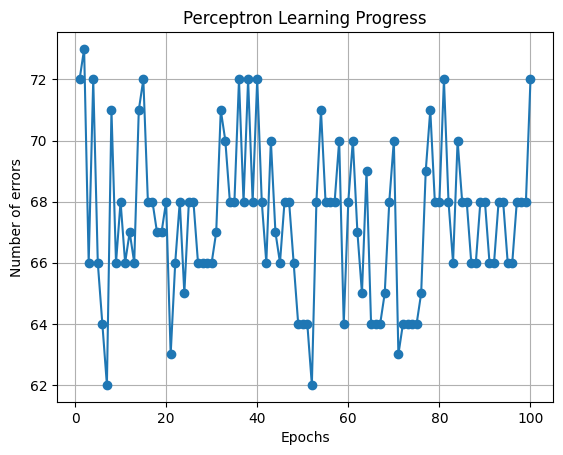

In [28]:
plt.plot(range(1, len(perceptron1.errors_) + 1), perceptron1.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of errors')
plt.title('Perceptron Learning Progress')
plt.grid(True)
plt.show()

## 5. Comparison of Perceptron learning rates

In the following section, we compare the performance of two Perceptrons with different learning rates (`eta`).
The goal is to illustrate how the learning rate affects the convergence of the model and the number of errors during training.

- **Perceptron 1**: Learning rate (`eta`) of 0.1 and 100 epochs.
- **Perceptron 2**: Learning rate (`eta`) of 0.5 and 100 epochs.

We visualize the number of errors over epochs for both Perceptrons, which helps us understand the impact of choosing different learning rates on the learning process.

In [29]:
# Define a second perceptron with a different learning rate and epochs
perceptron2 = Perceptron(eta=0.5, epochs=100)
perceptron2.train(X, y)

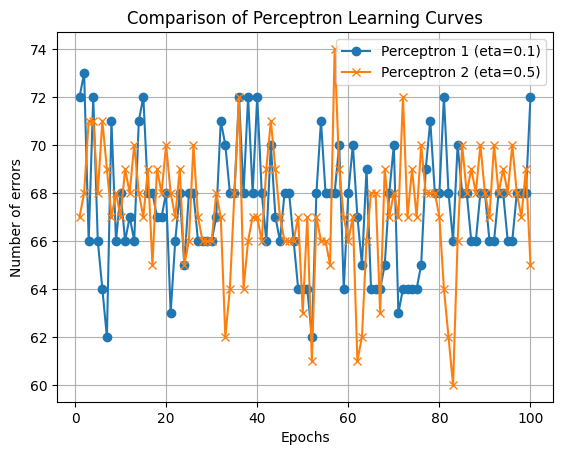

In [30]:
# Plot the learning curves of both perceptrons
plt.plot(range(1, len(perceptron1.errors_) + 1), perceptron1.errors_, marker='o', label='Perceptron 1 (eta=0.1)')
plt.plot(range(1, len(perceptron2.errors_) + 1), perceptron2.errors_, marker='x', label='Perceptron 2 (eta=0.5)')

plt.xlabel('Epochs')
plt.ylabel('Number of errors')
plt.title('Comparison of Perceptron Learning Curves')
plt.legend()
plt.grid(True)
plt.show()

## 6. Real dataset implementation
In this part, we implement the Perceptron class on a real dataset to demonstrate how it performs in a practical scenario.
We use the Breast Cancer dataset for this purpose, which is a well-known dataset for binary classification.

**Source**: The Breast Cancer Wisconsin (Diagnostic) dataset is available in the `sklearn.datasets` module and contains 569 samples of malignant and benign tumor cells. Each sample has 30 features computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.

In [31]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### 1. Data loading & processing

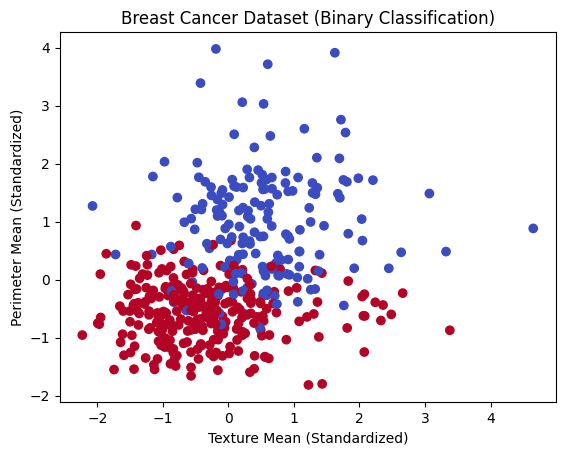

In [32]:
# Load the Breast Cancer dataset
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

# Convert target to -1 and 1 for perceptron
y = np.where(y == 0, -1, 1)

# Standardize the features for better convergence
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Select two features for simplicity: texture mean and perimeter mean
X = X[:, [1, 2]]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualize the selected features of the dataset
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm')
plt.xlabel('Texture Mean (Standardized)')
plt.ylabel('Perimeter Mean (Standardized)')
plt.title('Breast Cancer Dataset (Binary Classification)')
plt.show()

### 2. Perceptron training

In [33]:
# Train the perceptron
perceptron1 = Perceptron(eta=0.1, epochs=100)
perceptron1.train(X_train, y_train)

### 3. Evaluation

In [34]:
# Make predictions on the test set
y_hat = perceptron1.predict(X_test)
accuracy = np.sum(y_test == y_hat) / len(y_test)
print(f"Accuracy on test set: {accuracy:.2f}")

Accuracy on test set: 0.89


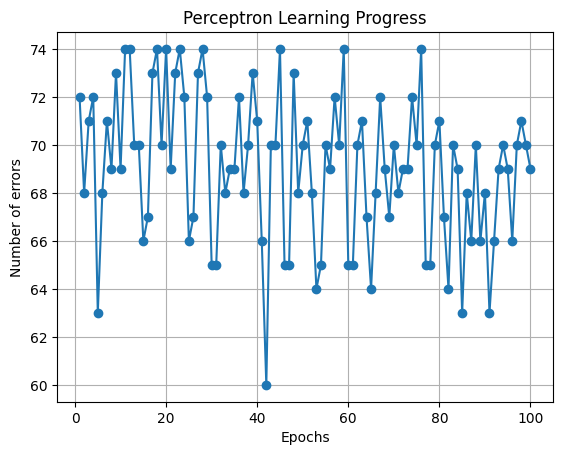

In [35]:
plt.plot(range(1, len(perceptron1.errors_) + 1), perceptron1.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of errors')
plt.title('Perceptron Learning Progress')
plt.grid(True)
plt.show()